# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=metric&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | maralal
Processing Record 2 of Set 1 | mar del plata
Processing Record 3 of Set 1 | as sulayyil
Processing Record 4 of Set 1 | haiku-pauwela
Processing Record 5 of Set 1 | vila franca do campo
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | san patricio
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | chibougamau
Processing Record 10 of Set 1 | tadine
Processing Record 11 of Set 1 | aasiaat
Processing Record 12 of Set 1 | banepa
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | hawaiian paradise park
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | el matama
Processing Record 17 of Set 1 | pangkalanbuun
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | shindand
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing Record 21 of Set 1 | wailua homeste

Processing Record 41 of Set 4 | lata
Processing Record 42 of Set 4 | podgornoye
Processing Record 43 of Set 4 | arcachon
Processing Record 44 of Set 4 | pirallahi
Processing Record 45 of Set 4 | novyy urengoy
Processing Record 46 of Set 4 | champerico
Processing Record 47 of Set 4 | alofi
Processing Record 48 of Set 4 | nouadhibou
Processing Record 49 of Set 4 | sterling
Processing Record 0 of Set 5 | rafsanjan
Processing Record 1 of Set 5 | general cabrera
Processing Record 2 of Set 5 | comodoro rivadavia
Processing Record 3 of Set 5 | dol-de-bretagne
Processing Record 4 of Set 5 | kodiak
Processing Record 5 of Set 5 | stutterheim
Processing Record 6 of Set 5 | oranjemund
Processing Record 7 of Set 5 | avarua
Processing Record 8 of Set 5 | gillette
Processing Record 9 of Set 5 | qaqortoq
Processing Record 10 of Set 5 | ytyk-kyuyel'
City not found. Skipping...
Processing Record 11 of Set 5 | port lincoln
Processing Record 12 of Set 5 | constantia
Processing Record 13 of Set 5 | uturoa


Processing Record 33 of Set 8 | patrocinio
Processing Record 34 of Set 8 | hanceville
Processing Record 35 of Set 8 | el progreso
Processing Record 36 of Set 8 | saint-philippe
Processing Record 37 of Set 8 | north amherst
Processing Record 38 of Set 8 | enewetak
Processing Record 39 of Set 8 | sao gabriel da cachoeira
Processing Record 40 of Set 8 | sorong
Processing Record 41 of Set 8 | lautoka
Processing Record 42 of Set 8 | shakawe
Processing Record 43 of Set 8 | sitka
Processing Record 44 of Set 8 | bikenibeu village
Processing Record 45 of Set 8 | porto novo
Processing Record 46 of Set 8 | taulaga
Processing Record 47 of Set 8 | tazacorte
Processing Record 48 of Set 8 | pacasmayo
Processing Record 49 of Set 8 | manicore
Processing Record 0 of Set 9 | puerto deseado
Processing Record 1 of Set 9 | muravlenko
Processing Record 2 of Set 9 | ortigueira
Processing Record 3 of Set 9 | fort st. john
Processing Record 4 of Set 9 | seogwipo
City not found. Skipping...
Processing Record 5 o

Processing Record 21 of Set 12 | sangod
Processing Record 22 of Set 12 | mount pearl
Processing Record 23 of Set 12 | abraham's bay
City not found. Skipping...
Processing Record 24 of Set 12 | monrovia
Processing Record 25 of Set 12 | mugia
Processing Record 26 of Set 12 | ulladulla
Processing Record 27 of Set 12 | jefferson city
Processing Record 28 of Set 12 | hihifo
City not found. Skipping...
Processing Record 29 of Set 12 | karakecili
Processing Record 30 of Set 12 | du quoin
Processing Record 31 of Set 12 | chaohu
Processing Record 32 of Set 12 | malpica
Processing Record 33 of Set 12 | fuvahmulah
City not found. Skipping...
Processing Record 34 of Set 12 | muzayri'
City not found. Skipping...
Processing Record 35 of Set 12 | el granada
Processing Record 36 of Set 12 | dakhla
Processing Record 37 of Set 12 | santa rosalia
Processing Record 38 of Set 12 | rabaul
Processing Record 39 of Set 12 | shumerlya
Processing Record 40 of Set 12 | kafr ad dawwar
Processing Record 41 of Set 1

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          595
Lat           595
Lng           595
Max Temp      595
Humidity      595
Cloudiness    595
Wind Speed    595
Country       595
Date          595
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,maralal,1.0968,36.6980,21.26,49,93,3.82,KE,1689174717
1,mar del plata,-38.0023,-57.5575,8.86,73,100,8.05,AR,1689174599
2,as sulayyil,20.4607,45.5779,42.71,9,31,5.13,SA,1689174717
3,haiku-pauwela,20.9219,-156.3051,25.02,75,0,2.57,US,1689174717
4,vila franca do campo,37.7167,-25.4333,23.23,83,89,8.77,PT,1689174717


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,maralal,1.0968,36.6980,21.26,49,93,3.82,KE,1689174717
1,mar del plata,-38.0023,-57.5575,8.86,73,100,8.05,AR,1689174599
2,as sulayyil,20.4607,45.5779,42.71,9,31,5.13,SA,1689174717
3,haiku-pauwela,20.9219,-156.3051,25.02,75,0,2.57,US,1689174717
4,vila franca do campo,37.7167,-25.4333,23.23,83,89,8.77,PT,1689174717


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

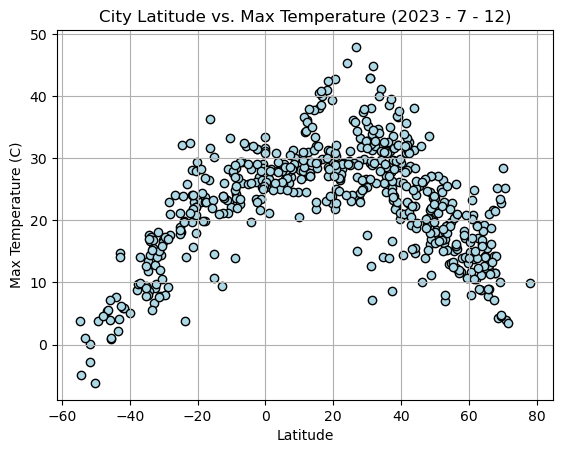

In [17]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], marker="o", facecolors="lightblue", edgecolors="black")

# Incorporate the other graph properties
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Max Temperature (2023 - 7 - 12)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

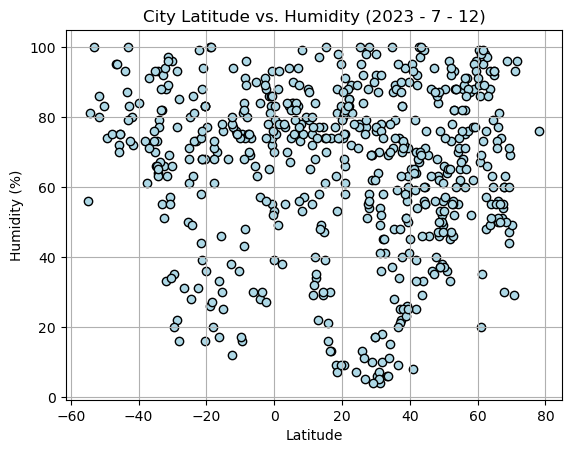

In [18]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], marker="o", facecolors="lightblue", edgecolors="black")

# Incorporate the other graph properties
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Humidity (2023 - 7 - 12)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

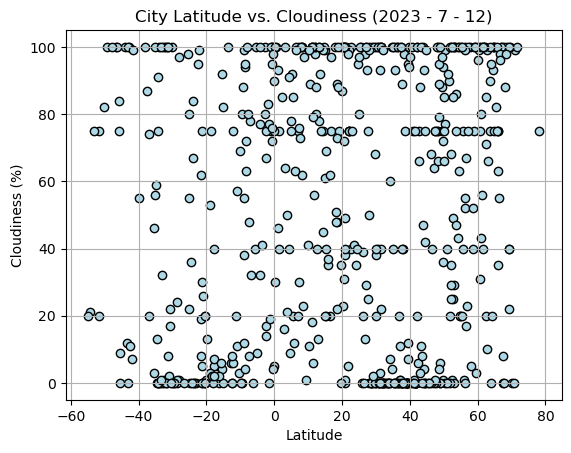

In [19]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], marker="o", facecolors="lightblue", edgecolors="black")

# Incorporate the other graph properties
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Cloudiness (2023 - 7 - 12)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

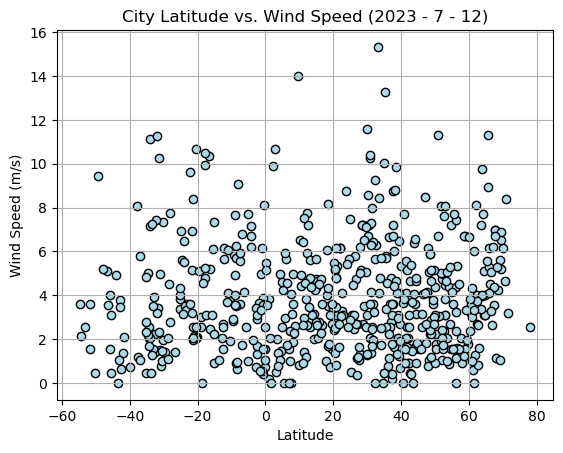

In [20]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], marker="o", facecolors="lightblue", edgecolors="black")

# Incorporate the other graph properties
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Wind Speed (2023 - 7 - 12)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
def linear_reg_plot(x_values,y_values,x_loc,y_loc,x_label,y_label,title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_loc,y_loc),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"]>=0,:])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,maralal,1.0968,36.6980,21.26,49,93,3.82,KE,1689174717
2,as sulayyil,20.4607,45.5779,42.71,9,31,5.13,SA,1689174717
3,haiku-pauwela,20.9219,-156.3051,25.02,75,0,2.57,US,1689174717
4,vila franca do campo,37.7167,-25.4333,23.23,83,89,8.77,PT,1689174717
6,san patricio,28.0170,-97.5169,33.26,58,50,6.18,US,1689174718


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"]<0,:])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mar del plata,-38.0023,-57.5575,8.86,73,100,8.05,AR,1689174599
5,port-aux-francais,-49.3500,70.2167,3.82,74,100,9.45,TF,1689174718
7,carnarvon,-24.8667,113.6333,18.19,80,0,6.91,AU,1689174652
9,tadine,-21.5500,167.8833,19.71,58,8,6.93,NC,1689174718
14,hithadhoo,-0.6000,73.0833,28.56,72,100,3.87,MV,1689174719


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.40398394986030955


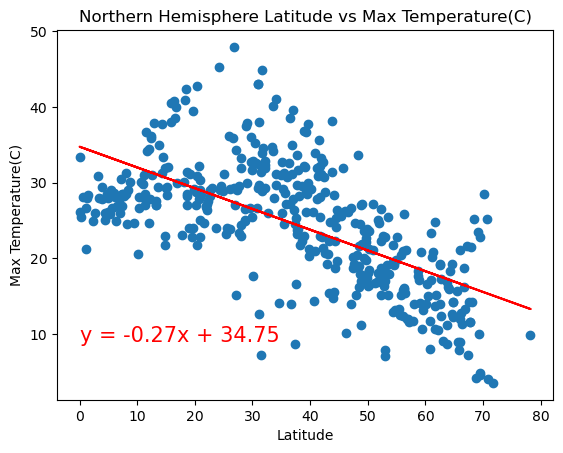

In [26]:
# Linear regression on Northern Hemisphere
linear_reg_plot(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],0,9,"Latitude","Max Temperature(C)","Northern Hemisphere Latitude vs Max Temperature(C)")

The r-squared is: 0.7183540633107632


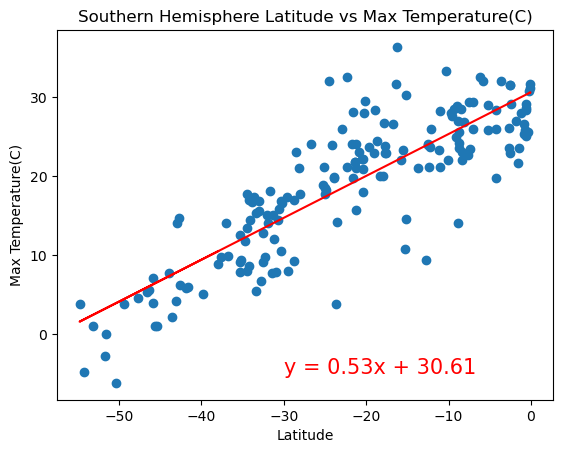

In [28]:
# Linear regression on Southern Hemisphere
linear_reg_plot(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],-30,-5,"Latitude","Max Temperature(C)","Southern Hemisphere Latitude vs Max Temperature(C)")

**Discussion about the linear relationship:** The relationship between latitude and temperature is a direct linear relationship when the hemispheres are seperate. The difference between the northern hemisphere and the southern hemisphere is that the relationships are opposite. In the northern hemisphere as your latitude increases the temperature decreases (as you move from the equator) while in the southern hemisphere as your latitude increases the temperature increases (as you approach the equator).

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0009894902985519898


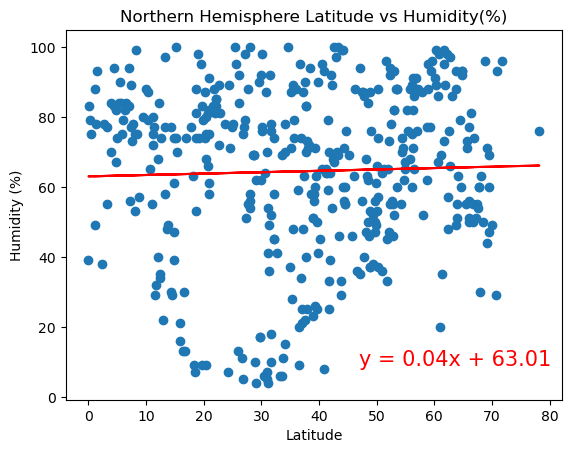

In [30]:
# Northern Hemisphere
linear_reg_plot(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],47,9,"Latitude","Humidity (%)","Northern Hemisphere Latitude vs Humidity(%)")

The r-squared is: 0.028331541208987964


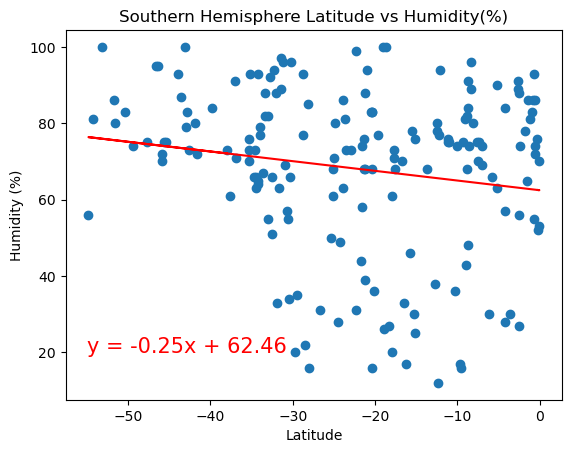

In [32]:
# Southern Hemisphere
linear_reg_plot(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],-55,20,"Latitude","Humidity (%)","Southern Hemisphere Latitude vs Humidity(%)")

**Discussion about the linear relationship:** After looking at the above 2 plots, even when there is seperation between hemispheres, there is no linear relationship between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 1.4281279998336737e-06


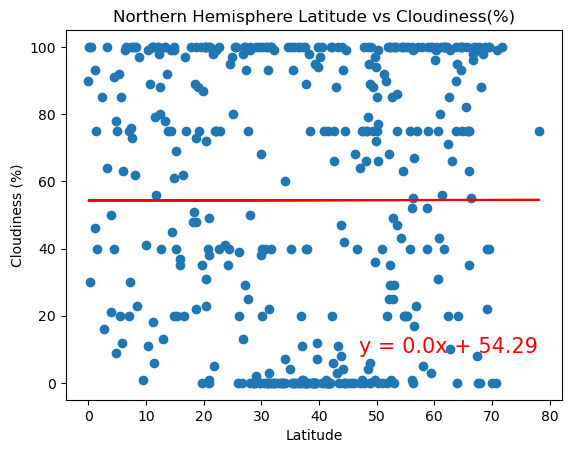

In [33]:
# Northern Hemisphere
linear_reg_plot(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],47,9,"Latitude","Cloudiness (%)","Northern Hemisphere Latitude vs Cloudiness(%)")

The r-squared is: 0.0002842228840630533


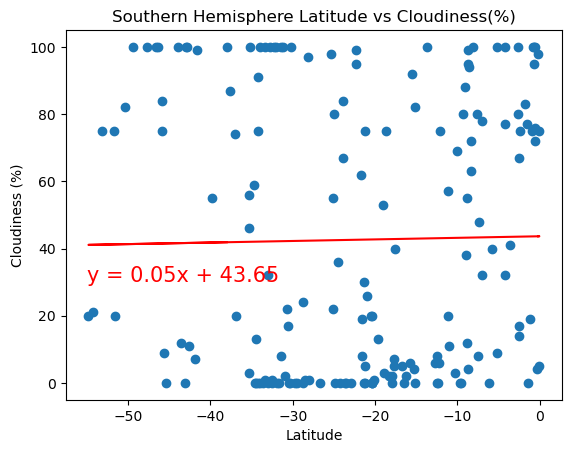

In [35]:
# Southern Hemisphere
linear_reg_plot(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],-55,30,"Latitude","Cloudiness (%)","Southern Hemisphere Latitude vs Cloudiness(%)")

**Discussion about the linear relationship:** After looking at the above 2 plots, even when there is seperation between hemispheres, there is no linear relationship between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.002364741108642201


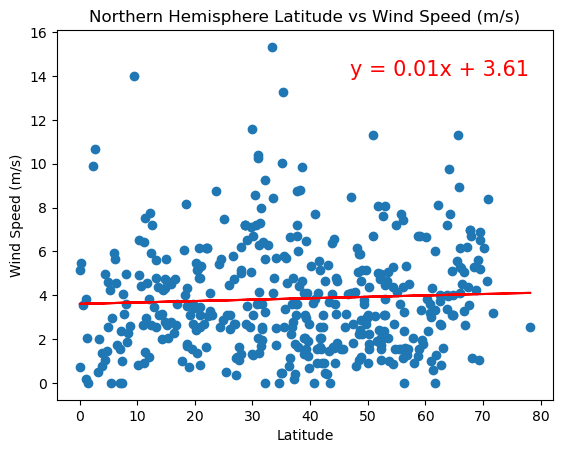

In [37]:
# Northern Hemisphere
linear_reg_plot(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],47,14,"Latitude","Wind Speed (m/s)","Northern Hemisphere Latitude vs Wind Speed (m/s)")

The r-squared is: 0.00543855744617466


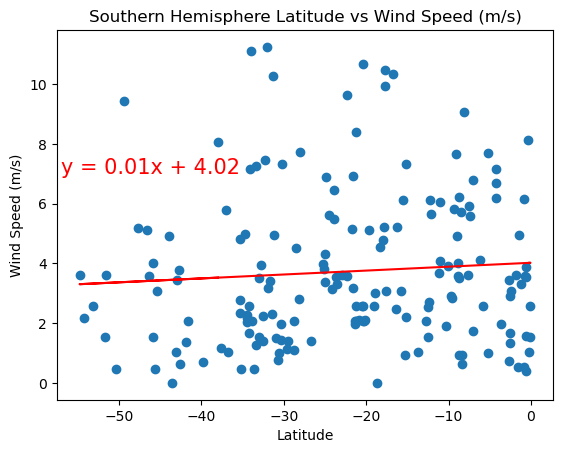

In [41]:
# Southern Hemisphere
linear_reg_plot(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],-57,7,"Latitude","Wind Speed (m/s)","Southern Hemisphere Latitude vs Wind Speed (m/s)")

**Discussion about the linear relationship:** While, this looks like there is more of a relationship between Latitude and Wind Speed, the above plots and values conclude that even when the cities are seperated by wind speed, there is no direct linear relationship between latitude and wind speed.